In [82]:
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
import matplotlib.pyplot as plt
from scipy.spatial import distance as dist

/anaconda/envs/py38_default/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [48]:
def shape_to_np(shape, dtype="int"):
    # initialize the list of (x, y)-coordinates
    coords = np.zeros((68, 2), dtype=dtype)
    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)
    # return the list of (x, y)-coordinates
    return coords

In [52]:
def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    # return a tuple of (x, y, w, h)
    return (x, y, w, h)

In [7]:
# define pre-trained landmark detector path
ld_path = 'models/shape_predictor_68_face_landmarks.dat'

# initialize dlib's face detector (HOG-based) and then create the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(ld_path)

In [125]:
# load a test image, resize it, and convert it to grayscale
def load_image(path, show=False):
    test_image = cv2.imread(path)
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    
    test_image = imutils.resize(test_image, width=500)
    gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)
    
    if show:
        plt.imshow(test_image)
        plt.show()
        plt.imshow(gray, cmap='gray')
        plt.show()
    # detect faces in the grayscale image
    rects = detector(gray, 1)
    return test_image, gray, rects

In [126]:
# # draw the face bounding box on the original rgb image, and show 
# bl_corner = (rects[0].bl_corner().x, rects[0].bl_corner().y)
# tr_corner = (rects[0].tr_corner().x, rects[0].tr_corner().y)
# image_rect = cv2.rectangle(test_image, bl_corner, tr_corner, (255,0,0), 2)
# plt.imshow(image_rect)
# plt.show()

In [127]:
def get_landmarks(img, gray, rects, show=False):
    # loop over the face detections
    for (i, rect) in enumerate(rects):
        # determine the facial landmarks for the face region, then convert the facial landmark (x, y)-coordinates to a NumPy array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)

        # convert dlib's rectangle to a OpenCV-style bounding box [i.e., (x, y, w, h)], then draw the face bounding box
        (x, y, w, h) = face_utils.rect_to_bb(rect)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        # loop over the (x, y)-coordinates for the facial landmarks and draw them on the image
        for (x, y) in shape:
            cv2.circle(img, (x, y), 1, (0, 0, 255), -1)
    if show:     
        # show the output image with the face detections + facial landmarks
        plt.imshow(img)
        plt.show()
    return shape

In [128]:
def get_eyes(shape):
    (leftEyeStart, leftEyeEnd) = face_utils.FACIAL_LANDMARKS_IDXS["left_eye"]
    (rightEyeStart, rightEyeEnd) = face_utils.FACIAL_LANDMARKS_IDXS["right_eye"]

    left_eye = shape[leftEyeStart:leftEyeEnd]
    right_eye = shape[rightEyeStart:rightEyeEnd]
    
    return left_eye, right_eye

In [129]:
def eye_aspect_ratio(eye):
    p2_minus_p6 = dist.euclidean(eye[1], eye[5])
    p3_minus_p5 = dist.euclidean(eye[2], eye[4])
    p1_minus_p4 = dist.euclidean(eye[0], eye[3])
    ear = (p2_minus_p6 + p3_minus_p5) / (2.0 * p1_minus_p4)
    return ear

Frame: 1030


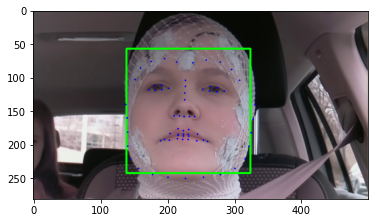

0.20463130769430204 0.23518021709589934
Frame: 1031


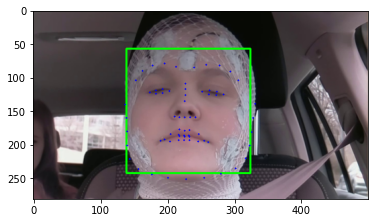

0.1733661710060497 0.1892057519422899
Frame: 1032


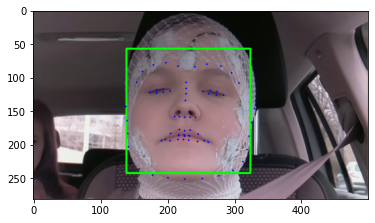

0.16694222384762533 0.16629752630943484
Frame: 1033


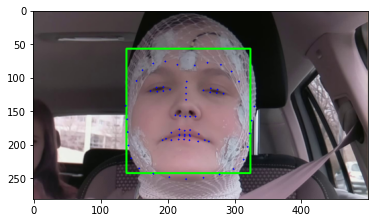

0.18382736442849093 0.20782983364410906
Frame: 1034


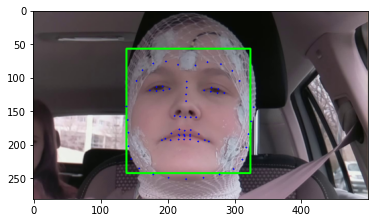

0.20098013110861648 0.20782983364410906
Frame: 1035


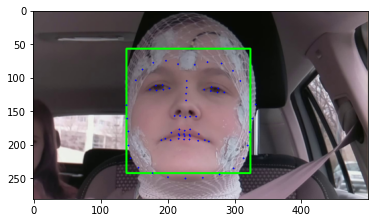

0.20098013110861648 0.24325212770525995
Frame: 1036


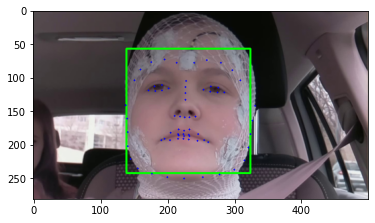

0.24207898934092967 0.24993788281638055


In [140]:
#path = 'test_frames/frame1030.jpg'
paths = ['test_frames/frame1030.jpg', 'test_frames/frame1031.jpg', 'test_frames/frame1032.jpg', 'test_frames/frame1033.jpg', 'test_frames/frame1034.jpg', 'test_frames/frame1035.jpg', 'test_frames/frame1036.jpg']

left_ears = []
right_ears = []

for path in paths:
    print("Frame: " + str(path[-8:-4]))
    test_img, gray, rects = load_image(path, show=False)
    shape = get_landmarks(test_img, gray, rects, show=True)
    left_eye, right_eye = get_eyes(shape)

    left_ear = eye_aspect_ratio(left_eye)
    right_ear = eye_aspect_ratio(right_eye)
    
    left_ears.append(left_ear)
    right_ears.append(right_ear)
    print(left_ear, right_ear)